# Reducción de dimensionalidad / PCA (Core)
Descripción
PCA (Core)

Reducción de Dimensionalidad

Descripción:

En esta actividad, aplicarás el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de un conjunto de datos grande. Utilizaremos el dataset «Wine Quality» disponible en Kaggle, que contiene variables químicas que influyen en la calidad del vino. PCA te permitirá reducir el número de características sin perder mucha información.

Enlace al dataset: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009



Objetivo:

El objetivo principal es utilizar PCA para reducir la dimensionalidad del dataset, identificar los componentes principales, y analizar cómo contribuyen a la variabilidad de los datos. Esto facilitará la comprensión del conjunto de datos y permitirá crear modelos más eficientes.



Instrucciones:

1. Carga de datos:
- Descarga y carga el dataset «Wine Quality» de Kaggle. Examina el contenido del dataset y verifica las variables químicas que afectan la calidad del vino.
- El dataset contiene 12 variables como el nivel de acidez, el pH, el contenido de alcohol, entre otras.

2. Exploración y preprocesamiento de datos:
- Realiza una exploración inicial del dataset. Revisa los valores nulos, los rangos de las variables y cualquier valor atípico que pueda afectar el rendimiento de PCA.
- Normaliza las variables, ya que PCA es sensible a las escalas de las características. Esto asegura que las variables tengan una contribución equitativa en la formación de los componentes principales.

3. Aplicación de PCA:
- Implementa PCA en el dataset para reducir la dimensionalidad. Determina cuántos componentes principales se necesitan para capturar al menos el 90% de la variabilidad de los datos.
- Visualiza el gráfico de «explained variance» para mostrar cómo cada componente principal contribuye a la variabilidad total de los datos.

4. Interpretación de los componentes principales:
- Analiza los coeficientes de cada componente principal para identificar qué variables tienen la mayor influencia en cada uno de ellos.
- Discute cómo la reducción de dimensionalidad mediante PCA puede simplificar la construcción de modelos predictivos al eliminar redundancia en las características.

5. Visualización y comparación:
- Visualiza los datos proyectados en los primeros dos componentes principales utilizando un gráfico de dispersión.
- Si el dataset tiene etiquetas de clase (como la calidad del vino), observa cómo se distribuyen las clases en el espacio de los componentes principales.



Análisis de Resultados:

- Realiza un análisis detallado sobre cuántos componentes principales son necesarios para capturar una cantidad significativa de variabilidad. Discute la importancia de las variables que más contribuyen a los primeros componentes.
- Explica cómo PCA puede ser útil para mejorar el rendimiento de los modelos de machine learning en datasets con muchas características.



Conclusión:

- Esta actividad tiene como objetivo principal aplicar PCA para la reducción de dimensionalidad en un dataset real. Al reducir la dimensionalidad, PCA facilita la creación de modelos más interpretables y eficientes.

# 2. Exploración y preprocesamiento de datos:

In [1]:
import pandas as pd

df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/winequality.csv')
print(df.head()) #Para asegurar que se cargó correctamente

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [2]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [3]:
#No tengo valores nulos
print(df.duplicated().sum())

240


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [5]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [8]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [9]:
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [13]:
#Los tipos de datos están correctos
#Veré los outliers si es que tengo
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2, subplot_titles=(
    'Distribución de fixed acidity', 
    'Distribución de volatile acidity', 
    'Distribución de citric acid', 
    'Distribución de residual sugar'))

fig.add_trace(go.Box(y=df['fixed acidity'], name='fixed acidity'), row=1, col=1)
fig.add_trace(go.Box(y=df['volatile acidity'], name='volatile acidity'), row=1, col=2)
fig.add_trace(go.Box(y=df['citric acid'], name='citric acid'), row=2, col=1)
fig.add_trace(go.Box(y=df['residual sugar'], name='residual sugar'), row=2, col=2)


fig.update_layout(
    title='Distribución de Variables del Dataset',
    showlegend=False,  # Oculta la leyenda para gráficos de caja
    height=600,  # Altura del gráfico
    width=800   # Ancho del gráfico
)

# Mostrar el gráfico
fig.show()

In [14]:
#Veo bastantes outliers pero primero veré que tal funciona así

# 3. Aplicación de PCA:


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/winequality.csv')

#Selecciono la variable objetivo y la separo
X = df.drop('quality', axis = 1) #Con esto selecciono todas las columnas, excepto quality
y = df['quality'] #Esta sería mi columna objetivo

#Ahora divido los conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Ahora hago el pipeline, utilizo pipeline porque lo utilicé en otros proyectos y la verdad que me gusta mucho su funcionamiento.

num_columns = X.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X.select_dtypes(include=['object', 'bool']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore') )
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

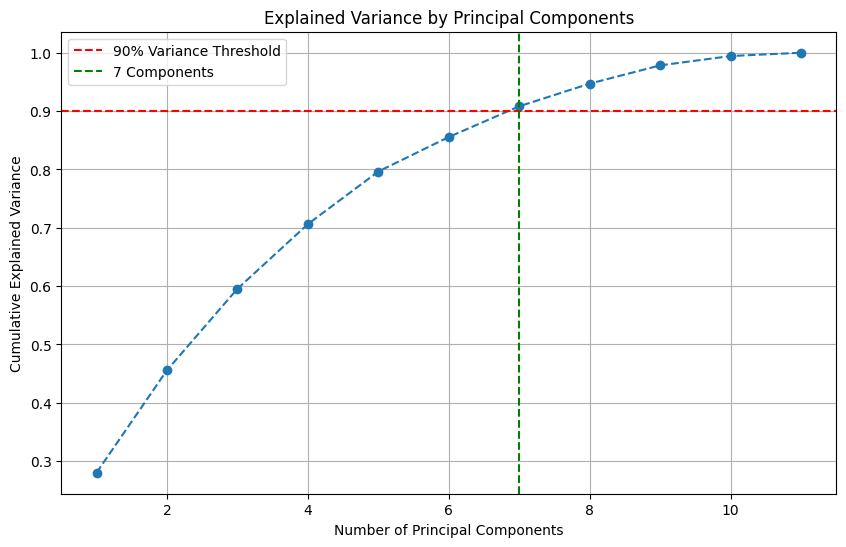

np.int64(7)

In [18]:
#Creo que con el pipeline es más fácil
#Ahora añado el PCA
from sklearn.decomposition import PCA

# PCA sin especificar el número de componentes
pca = PCA()

# Crear el pipeline incluyendo PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca)
])

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train)

#Varianza explicada acumulada
explained_variance_ratio = pipeline.named_steps['pca'].explained_variance_ratio_.cumsum()

#Número de componentes necesarios
components_needed = (explained_variance_ratio >= 0.90).argmax() + 1

#Gráfico de la varianza
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance Threshold')
plt.axvline(x=components_needed, color='g', linestyle='--', label=f'{components_needed} Components')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

components_needed


In [19]:
from sklearn.decomposition import PCA

# Añadimos PCA al pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=7))  
])

# Ajustar el pipeline a los datos de entrenamiento
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

In [21]:
# Extraer el modelo PCA ajustado del pipeline
pca_model = pipeline.named_steps['pca']

# Obtener los coeficientes (componentes principales)
pca_components = pca_model.components_

# Crear un DataFrame para visualizar la influencia de cada variable en los componentes principales
pca_df = pd.DataFrame(
    pca_components,
    columns=num_columns.tolist() + cat_columns.tolist(),
    index=[f'PC{i+1}' for i in range(pca_model.n_components_)]
)

print("Influencia de Variables en los Componentes Principales:")
print(pca_df)

Influencia de Variables en los Componentes Principales:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
PC1       0.486819         -0.230695     0.467369        0.152336   0.216295   
PC2      -0.109289          0.293355    -0.157400        0.239182   0.149466   
PC3       0.151640          0.442608    -0.220984       -0.049249   0.021770   
PC4      -0.211996          0.128183    -0.097646       -0.406056   0.663833   
PC5      -0.116956          0.204407    -0.055669        0.722412   0.286446   
PC6      -0.151683         -0.476617    -0.067697       -0.040310  -0.234620   
PC7       0.334642          0.468471    -0.140384       -0.280960  -0.391538   

     free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
PC1            -0.035997              0.024603  0.393214 -0.438454   0.245194   
PC2             0.505951              0.562241  0.237128 -0.001219  -0.038717   
PC3            -0.441759             -0.333724  0.344715 -0.

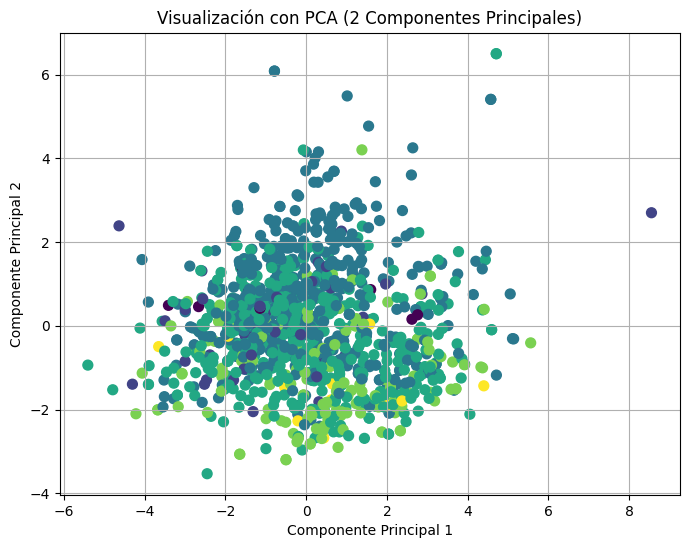

In [24]:
#De 11 pasamos a 7 componentes principales.
#Si uso componentes no relacionados, se mejora la estabilidad de los modelos predictivos
#y se reducen los riesgos de sobreajuste.
#La mayor parte de la variabilidad está contenida en los 7 componentes
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2))  
])

# Ajustar el pipeline a los datos de entrenamiento
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c=y_train, cmap='viridis', s=50)
plt.title("Visualización con PCA (2 Componentes Principales)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

In [25]:
#Este gráfico reduce las dimensiones a 2.
#Como se ven muy encimados los colores, un modelo predictivo posiblemente necesitará más información (puede ser más dimensiones)